<AxesSubplot:>

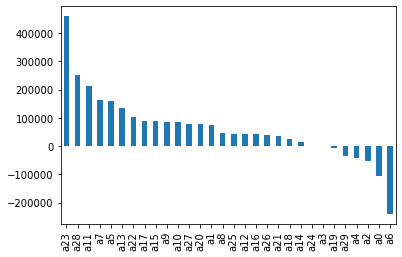

In [6]:
import pandas as pd
import numpy as np
import pandas_datareader.data as web

data=pd.read_csv('ex3_data.csv', index_col=0)

data=data.set_index('id') #id를 열 이름으로 

idx = list(map(lambda x:'a'+str(x), range(0,30))) #a0 ~ a29 리스트 / 검색을 위한 것
lst=[]

for j in idx:
    dt=data.loc[j] #a0의 데이터 프레임
    
    summ = 0
    
    for i in range(dt.shape[0]): #a0 데이터 프레임의 row개수
        code = dt.iloc[i,0] #주식종목 코드
        date = str(dt.iloc[i,1])
        hold_days = dt.iloc[i,2]
        
        df = web.DataReader(code[1:], 'naver', 
                            start=date, end = '2020-12-31') #주식 정보 df 데이터
        
        for col in df.columns : 
            df[col] = df[col].apply(int) #내용을 모두 int로 바꿈
            
        summ += df.iloc[hold_days,3]-df.iloc[0,3] #3이란건 종가를 의미
        #각 종목별 수익액을 합산한다(i개)
    
    lst.append(summ)

a= pd.Series(lst, index = idx)
a= a.sort_values(ascending=False)
a.plot(kind='bar')

In [5]:
df = web.DataReader(dt.iloc[0,0][1:], 'naver', start=str(dt.iloc[i,1]),
                   end = '2020-12-31')
for col in df.columns : 
            df[col] = df[col].apply(int)
df 
#종목 코드별로 buy_date부터의 가격을 모두 불러옴

,Open,High,Low,Close,Volume
Date,,,,,
2020-04-01,47450,47900,45800,45800,27259532
2020-04-02,46200,46850,45350,46800,21621076
2020-04-03,47400,47600,46550,47000,22784682
2020-04-06,47500,48800,47250,48700,23395726
2020-04-07,49650,50200,49000,49600,31524034
...,...,...,...,...,...
2020-12-23,72400,74000,72300,73900,19411326
2020-12-24,74100,78800,74000,77800,32502870
2020-12-28,79000,80100,78200,78700,40085044
